<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Information_Technology_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_path = '/content/drive/MyDrive/DATA 606 Capstone/Dataset/Merged Data'

In [5]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Information_Technology.csv")

In [ ]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28807 entries, 0 to 28806
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                28807 non-null  object 
 1   Symbol              28807 non-null  object 
 2   Series              28807 non-null  object 
 3   Prev Close          28807 non-null  float64
 4   Open                28807 non-null  float64
 5   High                28807 non-null  float64
 6   Low                 28807 non-null  float64
 7   Last                28807 non-null  float64
 8   Close               28807 non-null  float64
 9   VWAP                28807 non-null  float64
 10  Volume              28807 non-null  int64  
 11  Turnover            28807 non-null  float64
 12  Trades              14736 non-null  float64
 13  Deliverable Volume  26578 non-null  float64
 14  %Deliverble         26578 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 3.3

In [6]:
# Summary statistics of the dataset
print(sector_data.describe())

         Prev Close          Open          High           Low          Last  \
count  23686.000000  23686.000000  23686.000000  23686.000000  23686.000000   
mean    1323.238595   1324.439395   1345.588158   1301.077077   1322.680803   
std     1272.808417   1273.941423   1299.402401   1243.546563   1269.884203   
min       89.700000     87.100000     94.750000     86.650000     89.000000   
25%      506.100000    506.000000    514.350000    498.000000    506.000000   
50%      909.250000    910.000000    925.000000    895.875000    909.000000   
75%     1810.612500   1815.500000   1842.137500   1779.500000   1810.225000   
max    16855.900000  16800.000000  16875.250000  16253.000000  16875.250000   

              Close          VWAP        Volume      Turnover        Trades  \
count  23686.000000  23686.000000  2.368600e+04  2.368600e+04  1.228000e+04   
mean    1322.730149   1323.407547  1.994217e+06  2.036079e+14  7.254268e+04   
std     1269.952770   1271.371261  3.392256e+06  2.

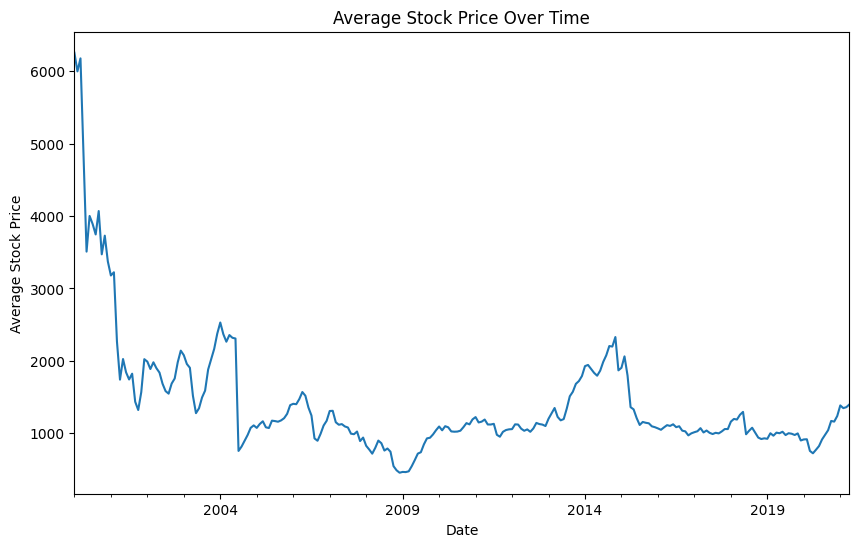

In [7]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

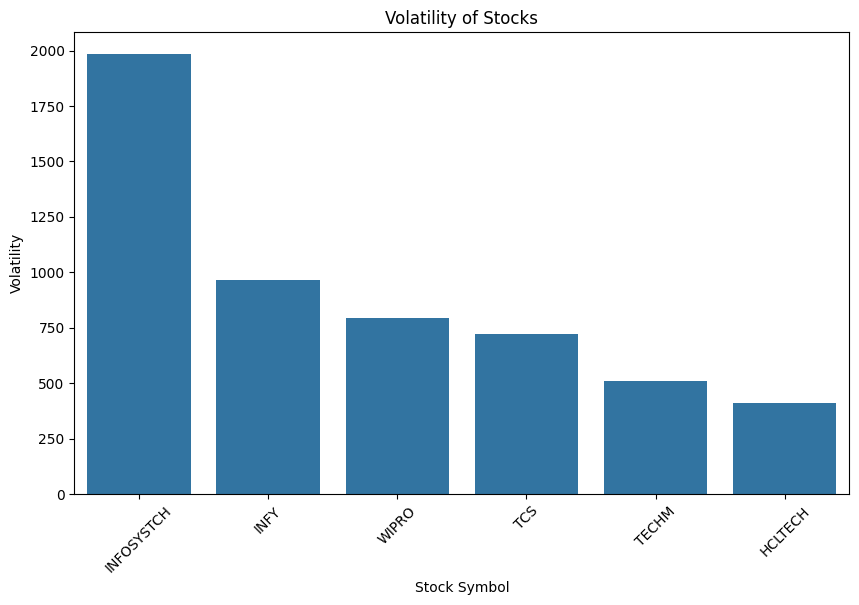

In [8]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

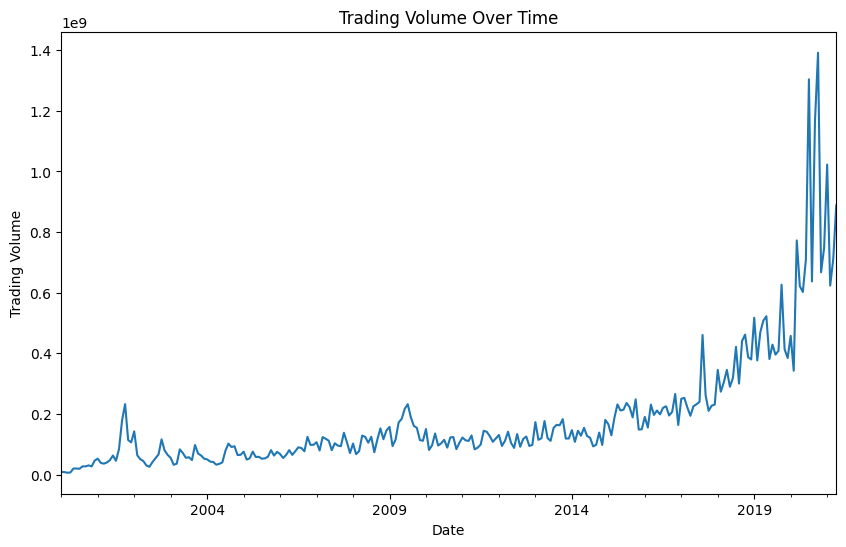

In [9]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


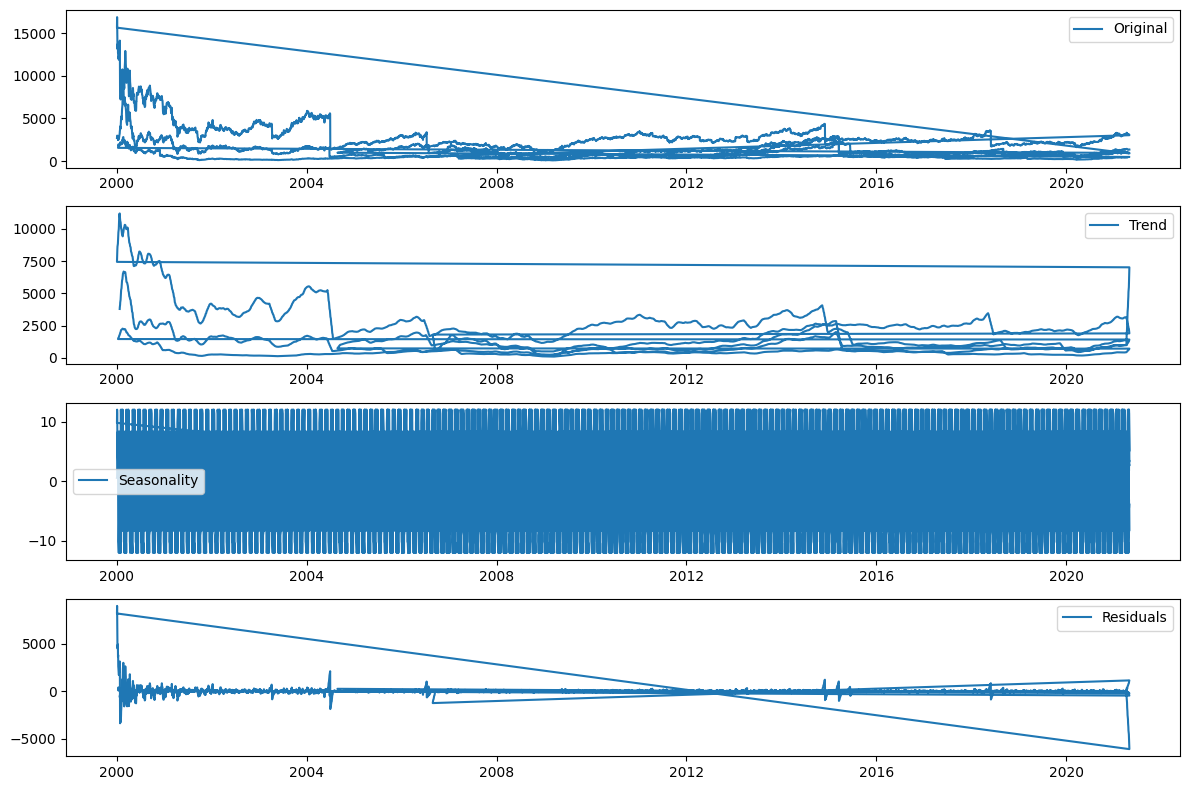

In [11]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

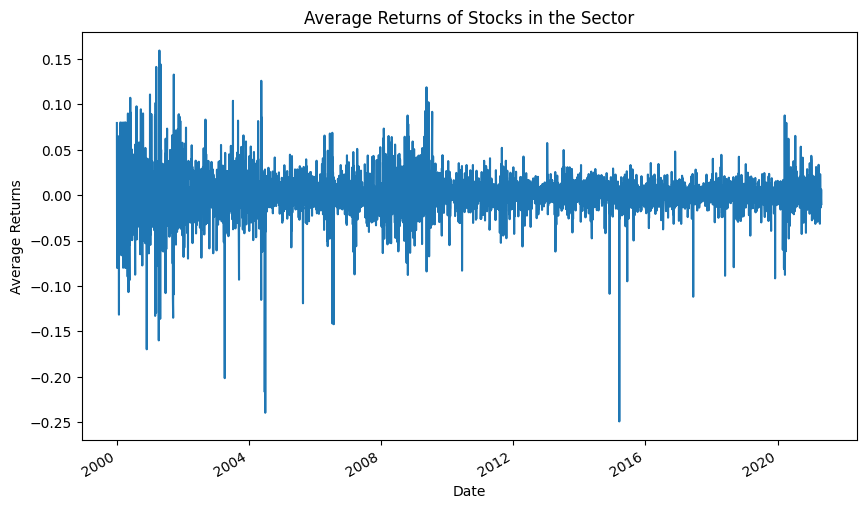

In [12]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()